### **Test Baseline**

### **Table of Contents**

1. Libraries

2. Baseline Environment

3. PPO Algorithm

4. A2C Algorithm

5. DQN Algorithm

6. Test Performance Comparison

### **Libraries**

In [25]:
# Algorithms
from stable_baselines3 import PPO
from stable_baselines3 import A2C
from stable_baselines3 import DQN
import pickle
from stable_baselines3.common.vec_env import DummyVecEnv

# Model evaluation
from stable_baselines3.common.evaluation import evaluate_policy 
import numpy as np
from stable_baselines3.common.callbacks import BaseCallback


# hyperameters tuning
from sklearn.model_selection import ParameterGrid
from concurrent.futures import ThreadPoolExecutor, as_completed

# Wrappers 
import gymnasium as gym
from gymnasium.wrappers import TimeLimit
from gymnasium import RewardWrapper, ActionWrapper


# Graphs
import matplotlib.pyplot as plt


from stable_baselines3.common.logger import configure


from torch.utils.tensorboard import SummaryWriter

### **Baseline Test Environment**

To establish a method of comparison, we decided to test the baseline model alongside the RL models.

In [2]:
test_env = gym.make('Taxi-v3')

### **PPO**

Proximal Policy Optimization (PPO) is a reinforcement learning algorithm that improves an agent's decision-making by optimizing its policy while maintaining stability. It does this by balancing exploration and exploitation, using clipped updates to prevent large, destabilizing changes to the policy, making it efficient and robust for a wide range of tasks.

In [5]:
from tqdm import tqdm  # Para criar uma barra de progresso

writer = SummaryWriter(log_dir="./tensorboard/ppo_test/")
num_episodes = 10_000  # Número de episódios para testar o modelo
model = PPO.load("ppo_taxi")  # Carregar o modelo treinado
all_rewards_ppo = []  # Lista para guardar as recompensas de cada episódio
all_steps_ppo = []  # Lista para guardar o número de passos de

# Testar o modelo em 1000 episódios com barra de progresso
with tqdm(total=num_episodes, desc="Testing Episodes") as pbar:
    for episode in range(1, num_episodes + 1):
        obs, _ = test_env.reset()  # Reiniciar o ambiente
        done = False
        total_reward = 0
        steps = 0

        while not done and steps < 200:
            action, _ = model.predict(obs, deterministic=True)  # Política determinística
            action = int(action)  # Converter ação para inteiro, se necessário
            obs, reward, done, _, _ = test_env.step(action)
            total_reward += reward
            steps += 1

        # Guardar os resultados
        all_rewards_ppo.append(total_reward)
        all_steps_ppo.append(steps)

        # Logar no TensorBoard
        writer.add_scalar("Test/Episode_Reward", total_reward, episode)
        writer.add_scalar("Test/Episode_Steps", steps, episode)

        # Atualizar a barra de progresso
        pbar.set_postfix({"Reward": total_reward, "Steps": steps})
        pbar.update(1)

# Fechar o TensorBoard Writer
writer.close()

# Exibir estatísticas finais
print(f"Average Reward over {num_episodes} episodes: {np.mean(all_rewards_ppo)}")
print(f"Average Steps over {num_episodes} episodes: {np.mean(all_steps_ppo)}")


Testing Episodes: 100%|██████████| 10000/10000 [01:17<00:00, 129.27it/s, Reward=-200, Steps=200]

Average Reward over 10000 episodes: -76.2896
Average Steps over 10000 episodes: 88.7993


These metrics indicate that the PPO model's performance stabilizes with these average rewards and steps over a significant number of testing episodes. The negative reward suggests that the environment penalizes the agent's actions or results, while the steps indicate the agent's ability to navigate within the environment over each episode.

### **A2C**

Advantage Actor-Critic (A2C) is a reinforcement learning algorithm that combines value-based and policy-based methods. It uses an actor to determine actions and a critic to evaluate how good the actions are using an advantage function. By updating both components simultaneously, A2C achieves efficient learning while reducing variance in policy updates.

In [7]:
from tqdm import tqdm  # Para criar uma barra de progresso

writer = SummaryWriter(log_dir="./tensorboard/a2c_test/")
num_episodes = 10_000  # Número de episódios para testar o modelo
model = A2C.load("a2c_taxi")  # Carregar o modelo treinado
all_rewards_a2c = []  # Lista para guardar as recompensas de cada episódio
all_steps_a2c = []  # Lista para guardar o número de passos de

# Testar o modelo em 1000 episódios com barra de progresso
with tqdm(total=num_episodes, desc="Testing Episodes") as pbar:
    for episode in range(1, num_episodes + 1):
        obs, _ = test_env.reset()  # Reiniciar o ambiente
        done = False
        total_reward = 0
        steps = 0

        while not done and steps < 200:
            action, _ = model.predict(obs, deterministic=True)  # Política determinística
            action = int(action)  # Converter ação para inteiro, se necessário
            obs, reward, done, _, _ = test_env.step(action)
            total_reward += reward
            steps += 1

        # Guardar os resultados
        all_rewards_a2c.append(total_reward)
        all_steps_a2c.append(steps)

        # Logar no TensorBoard
        writer.add_scalar("Test/Episode_Reward", total_reward, episode)
        writer.add_scalar("Test/Episode_Steps", steps, episode)

        # Atualizar a barra de progresso
        pbar.set_postfix({"Reward": total_reward, "Steps": steps})
        pbar.update(1)

# Fechar o TensorBoard Writer
writer.close()

# Exibir estatísticas finais
print(f"Average Reward over {num_episodes} episodes: {np.mean(all_rewards_a2c)}")
print(f"Average Steps over {num_episodes} episodes: {np.mean(all_steps_a2c)}")


Testing Episodes: 100%|██████████| 10000/10000 [02:48<00:00, 59.22it/s, Reward=-200, Steps=200]


Average Reward over 10000 episodes: -200.0
Average Steps over 10000 episodes: 200.0


These results indicate that the A2C model consistently hits the maximum number of steps per episode but receives the lowest possible reward, suggesting it struggles to perform effectively in the environment.

### **DQN**

Deep Q-Network (DQN) is a reinforcement learning algorithm that combines Q-learning with deep neural networks. It learns to approximate the Q-value function, which predicts the expected reward for taking a specific action in a given state. DQN uses techniques like experience replay and target networks to stabilize learning and improve performance, making it suitable for environments with large and complex state spaces.

In [8]:
from tqdm import tqdm  # Para criar uma barra de progresso

writer = SummaryWriter(log_dir="./tensorboard/dqn_test/")
num_episodes = 10_000  # Número de episódios para testar o modelo
model = DQN.load("dqn_taxi")  # Carregar o modelo treinado
all_rewards_dqn = []  # Lista para guardar as recompensas de cada episódio
all_steps_dqn = []  # Lista para guardar o número de passos de

# Testar o modelo em 1000 episódios com barra de progresso
with tqdm(total=num_episodes, desc="Testing Episodes") as pbar:
    for episode in range(1, num_episodes + 1):
        obs, _ = test_env.reset()  # Reiniciar o ambiente
        done = False
        total_reward = 0
        steps = 0

        while not done and steps < 200:
            action, _ = model.predict(obs, deterministic=True)  # Política determinística
            action = int(action)  # Converter ação para inteiro, se necessário
            obs, reward, done, _, _ = test_env.step(action)
            total_reward += reward
            steps += 1

        # Guardar os resultados
        all_rewards_dqn.append(total_reward)
        all_steps_dqn.append(steps)

        # Logar no TensorBoard
        writer.add_scalar("Test/Episode_Reward", total_reward, episode)
        writer.add_scalar("Test/Episode_Steps", steps, episode)

        # Atualizar a barra de progresso
        pbar.set_postfix({"Reward": total_reward, "Steps": steps})
        pbar.update(1)

# Fechar o TensorBoard Writer
writer.close()

# Exibir estatísticas finais
print(f"Average Reward over {num_episodes} episodes: {np.mean(all_rewards_dqn)}")
print(f"Average Steps over {num_episodes} episodes: {np.mean(all_steps_dqn)}")


Testing Episodes: 100%|██████████| 10000/10000 [00:12<00:00, 816.63it/s, Reward=13, Steps=8]


Average Reward over 10000 episodes: 7.8946
Average Steps over 10000 episodes: 13.1054


These results suggest that the DQN model performs efficiently, achieving a positive average reward with relatively few steps per episode, indicating successful and optimal decision-making in the given environment.

### **Test Performance Comparison**

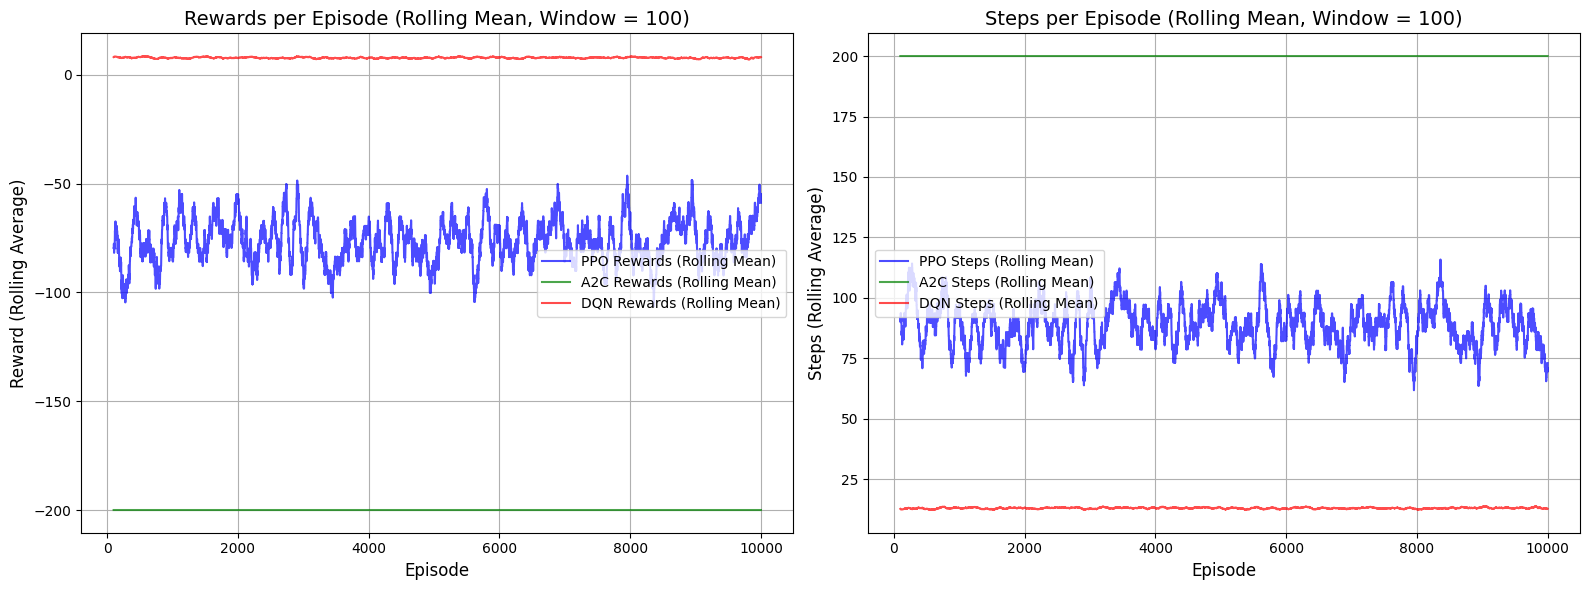

In [13]:
import matplotlib.pyplot as plt
import pandas as pd  # Necessário para calcular a média móvel

# Definir o tamanho da média móvel
rolling_window = 100

# Calcular a média móvel das recompensas
ppo_rewards_mean = pd.Series(all_rewards_ppo).rolling(rolling_window).mean()
a2c_rewards_mean = pd.Series(all_rewards_a2c).rolling(rolling_window).mean()
dqn_rewards_mean = pd.Series(all_rewards_dqn).rolling(rolling_window).mean()

# Calcular a média móvel dos passos
ppo_steps_mean = pd.Series(all_steps_ppo).rolling(rolling_window).mean()
a2c_steps_mean = pd.Series(all_steps_a2c).rolling(rolling_window).mean()
dqn_steps_mean = pd.Series(all_steps_dqn).rolling(rolling_window).mean()

# Criar os subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Média móvel das recompensas
axes[0].plot(ppo_rewards_mean, label="PPO Rewards (Rolling Mean)", color='blue', alpha=0.7)
axes[0].plot(a2c_rewards_mean, label="A2C Rewards (Rolling Mean)", color='green', alpha=0.7)
axes[0].plot(dqn_rewards_mean, label="DQN Rewards (Rolling Mean)", color='red', alpha=0.7)
axes[0].set_title(f"Rewards per Episode (Rolling Mean, Window = {rolling_window})", fontsize=14)
axes[0].set_xlabel("Episode", fontsize=12)
axes[0].set_ylabel("Reward (Rolling Average)", fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Gráfico 2: Média móvel dos passos
axes[1].plot(ppo_steps_mean, label="PPO Steps (Rolling Mean)", color='blue', alpha=0.7)
axes[1].plot(a2c_steps_mean, label="A2C Steps (Rolling Mean)", color='green', alpha=0.7)
axes[1].plot(dqn_steps_mean, label="DQN Steps (Rolling Mean)", color='red', alpha=0.7)
axes[1].set_title(f"Steps per Episode (Rolling Mean, Window = {rolling_window})", fontsize=14)
axes[1].set_xlabel("Episode", fontsize=12)
axes[1].set_ylabel("Steps (Rolling Average)", fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Ajustar layout e exibir
plt.tight_layout()
plt.show()


DQN outperforms both PPO and A2C, achieving the best average rewards and the fewest steps per episode, indicating optimal learning and navigation. PPO performs moderately well but lacks consistency, while A2C struggles entirely, unable to adapt or improve over episodes.